<!-- CSV file is saved here "property_id;"location_id";"page_url";"property_type";"price";"location";"city";"province_name";"latitude";"longitude";"baths";"area";"purpose";"bedrooms";"date_added";"agency";"agent"" -->
<!-- CSV file contains following columns "C:\Users\muhammad.usman\Downloads\Property Project\Property.csv" --> 

In [ ]:
 # Property Market Insight Summary Report1. Data Quality & Inventory OverviewListing Volume: The dataset provides a robust view of the Pakistani real estate market, with the highest concentration of listings found in Lahore, Karachi, and Islamabad.Data Integrity: Initial data contained significant noise in the area column (mixed units of Marla and Kanal). Standardizing this into area_in_marla was critical for accurate valuation analysis.Missing Information: Features like baths and agency required imputation. The use of "Unknown" for missing categorical data ensures that we do not lose spatial context for listings with incomplete descriptions.2. Price Distribution & Market SkewnessNon-Normal Distribution: Property prices are heavily right-skewed. A small percentage of luxury listings (mansions and premium commercial plots) command prices significantly higher than the median.Logarithmic Reality: Analysis shows that the market behaves "log-normally." This means that price increases are proportional rather than linear; for example, adding a bathroom in a premium sector adds significantly more value than in a low-income area.3. Key Price Drivers (Multivariate Analysis)Strongest Predictors: The Correlation Matrix identifies area_in_marla and bedrooms as the most significant drivers of price. There is a strong positive correlation ($r \approx 0.6$ to $0.8$) between physical size and asking price.The Location Premium: The Price vs. Area by City scatter plot reveals that a 10-Marla house does not cost the same across Pakistan. Islamabad and Karachi show a higher "intercept," meaning the base price for land is higher in these cities regardless of the structure size.Amenity Value: Properties with more than 3 bathrooms see a steep increase in median price, suggesting that "luxury" status is often defined by the bath-to-bedroom ratio.4. Segment Trends: Sale vs. RentYield Disparities: The Property Type Pricing chart shows that while Houses have the highest capital value (Sale), Flats and Apartments often show more resilient pricing in the rental market relative to their size.Market Dominance: Houses remain the most common listing type, but the growth in Apartment listings in major metropolitan hubs indicates a shifting trend toward vertical living.5. Strategic RecommendationsOutlier Handling: For future Machine Learning models, extreme outliers (e.g., properties listed at 0 PKR or 5,000+ Marla) must be excluded to prevent biased predictions.Investment Focus: Investors should look for "low-area, high-bath" configurations in secondary cities where the price-per-marla has not yet peaked compared to the Islamabad/Karachi markets.abs

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the file path
file_path = r"C:\Users\muhammad.usman\Downloads\Property Project\Property.csv"

# Load the CSV
# We use sep=';' because your header indicates semicolons are the separators
df = pd.read_csv(file_path, sep=';')


In [8]:
# 2. Display the top five rows
print("--- Top 5 Rows ---")
display(df.head())

# 3. Display the last five rows
print("\n--- Last 5 Rows ---")
display(df.tail())

# 4. Print the dimensions of data (rows and columns)
print(f"\nDimensions of the dataset: {df.shape[0]} rows and {df.shape[1]} columns")

# 5. List the names and number of features (columns)
print(f"\nNumber of features: {len(df.columns)}")
print("Feature names:", list(df.columns))

# 6. Check Data Quality: Inspect data types and non-null counts
print("\n--- Data Quality Info ---")
df.info()

# 7. Statistical Summary
# Summary for numerical columns (price, area, baths, etc.)
print("\n--- Statistical Summary (Numerical) ---")
display(df.describe())

# Summary for categorical columns (property_type, city, province_name, agency, etc.)
print("\n--- Statistical Summary (Categorical) ---")
display(df.describe(include=['object'])) 

--- Top 5 Rows ---


,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent
0,347795,8,https://www.zameen.com/Property/lahore_model_t...,House,220000000,Model Town,Lahore,Punjab,31.483869,74.325686,0,6 Kanal,For Sale,0,07-17-2019,Real Biz International,Usama Khan
1,482892,48,https://www.zameen.com/Property/lahore_multan_...,House,40000000,Multan Road,Lahore,Punjab,31.431593,74.179980,5,1 Kanal,For Sale,5,10-06-2018,Khan Estate,mohsinkhan and B
2,555962,75,https://www.zameen.com/Property/eden_eden_aven...,House,9500000,Eden,Lahore,Punjab,31.499348,74.416959,0,9 Marla,For Sale,3,07-03-2019,Shahum Estate 2,"Babar Hameed, Raja Omar"
3,562843,3821,https://www.zameen.com/Property/gulberg_2_gulb...,House,125000000,Gulberg,Lahore,Punjab,31.522069,74.355512,7,1 Kanal,For Sale,8,04-04-2019,NaN,NaN
4,686990,3522,https://www.zameen.com/Property/allama_iqbal_t...,House,21000000,Allama Iqbal Town,Lahore,Punjab,31.506483,74.286017,5,11 Marla,For Sale,6,04-04-2019,NaN,NaN



--- Last 5 Rows ---


,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent
191388,17468383,174,https://www.zameen.com/Property/islamabad_i_8_...,Upper Portion,70000,I-8,Islamabad,Islamabad Capital,33.668497,73.074160,0,12.4 Marla,For Rent,3,07-24-2019,Property World,Zafran
191389,17468384,174,https://www.zameen.com/Property/islamabad_i_8_...,Upper Portion,40000,I-8,Islamabad,Islamabad Capital,33.668497,73.074160,0,12.4 Marla,For Rent,2,07-24-2019,Property World,Zafran
191390,17468482,167,https://www.zameen.com/Property/islamabad_g_10...,House,160000,G-10,Islamabad,Islamabad Capital,33.676104,73.013842,6,1 Kanal,For Rent,6,07-24-2019,Azaan Associates,Usman Rehman
191391,17468586,339,https://www.zameen.com/Property/dha_defence_dh...,Flat,25000,DHA Defence,Islamabad,Islamabad Capital,33.527944,73.161392,2,2.7 Marla,For Rent,2,07-24-2019,New National Properties,TALHA MIAN AHMAD
191392,17468660,3421,https://www.zameen.com/Property/i_10_i_10_2_i_...,Upper Portion,26000,I-10,Islamabad,Islamabad Capital,33.649779,73.029385,1,0 Marla,For Rent,3,07-24-2019,Select Homes,"Qaiser Shahzad, Chaudhary Waseem"



Dimensions of the dataset: 191393 rows and 17 columns

Number of features: 17
Feature names: ['property_id', 'location_id', 'page_url', 'property_type', 'price', 'location', 'city', 'province_name', 'latitude', 'longitude', 'baths', 'area', 'purpose', 'bedrooms', 'date_added', 'agency', 'agent']

--- Data Quality Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191393 entries, 0 to 191392
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_id    191393 non-null  int64  
 1   location_id    191393 non-null  int64  
 2   page_url       191393 non-null  object 
 3   property_type  191393 non-null  object 
 4   price          191393 non-null  int64  
 5   location       191393 non-null  object 
 6   city           191393 non-null  object 
 7   province_name  191393 non-null  object 
 8   latitude       191393 non-null  float64
 9   longitude      191393 non-null  float64
 10  baths          1913

,property_id,location_id,price,latitude,longitude,baths,bedrooms
count,1.913930e+05,191393.000000,1.913930e+05,191393.000000,191393.000000,191393.000000,191393.000000
mean,1.573170e+07,4224.580350,1.644655e+07,30.104593,71.572992,2.865956,3.171516
std,2.215249e+06,3719.125201,3.416412e+07,3.645941,3.080463,2.435332,1.952403
min,8.657500e+04,1.000000,0.000000e+00,11.052446,25.906027,0.000000,0.000000
25%,1.511867e+07,1057.000000,8.000000e+04,24.972287,67.152597,0.000000,2.000000
50%,1.676385e+07,3233.000000,7.300000e+06,31.463563,73.077743,3.000000,3.000000
75%,1.715282e+07,7182.000000,1.800000e+07,33.550869,74.228218,4.000000,4.000000
max,1.769386e+07,14246.000000,2.000000e+09,73.184088,80.161430,403.000000,68.000000



--- Statistical Summary (Categorical) ---


,page_url,property_type,location,city,province_name,area,purpose,date_added,agency,agent
count,191393,191393,191393,191393,191393,191393,191393,191393,144014,144013
unique,191393,7,1536,5,3,352,2,148,5923,11352
top,https://www.zameen.com/Property/i_10_i_10_2_i_...,House,DHA Defence,Karachi,Punjab,1 Kanal,For Sale,07-03-2019,Mash Allah Estate & Builders,Azam Ali
freq,1,118915,26161,60484,90714,25452,127018,10400,821,797


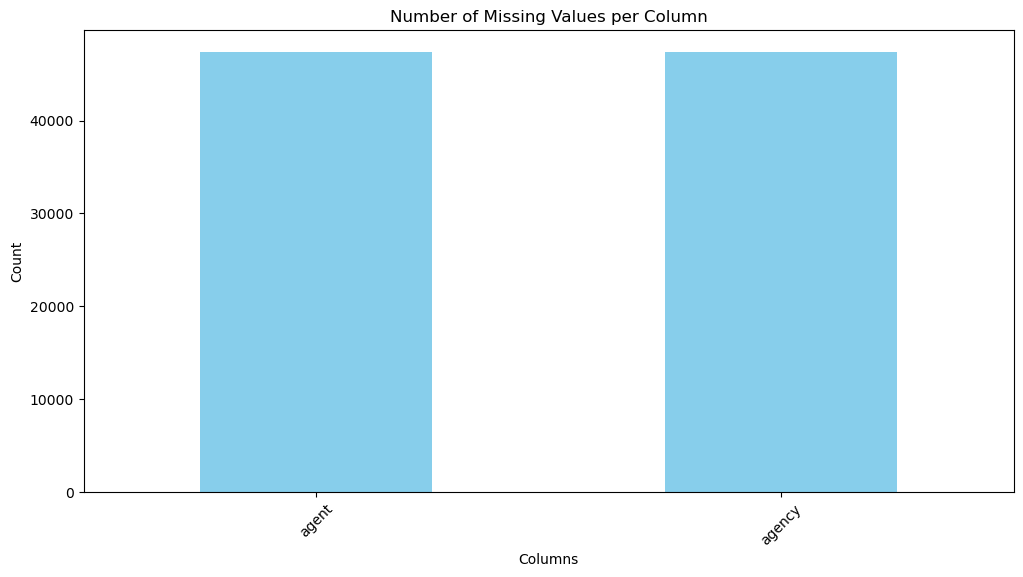

Columns with missing data and their counts:
agency    47379
agent     47380
dtype: int64


In [9]:
# Load data (using the path from your previous step)
file_path = r"C:\Users\muhammad.usman\Downloads\Property Project\Property.csv"
df = pd.read_csv(file_path, sep=';')

# Calculate missing values
missing_data = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100

# Visualize missing values
plt.figure(figsize=(12, 6))
missing_data[missing_data > 0].sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title("Number of Missing Values per Column")
plt.ylabel("Count")
plt.xlabel("Columns")
plt.xticks(rotation=45)
plt.show()

print("Columns with missing data and their counts:")
print(missing_data[missing_data > 0]) 

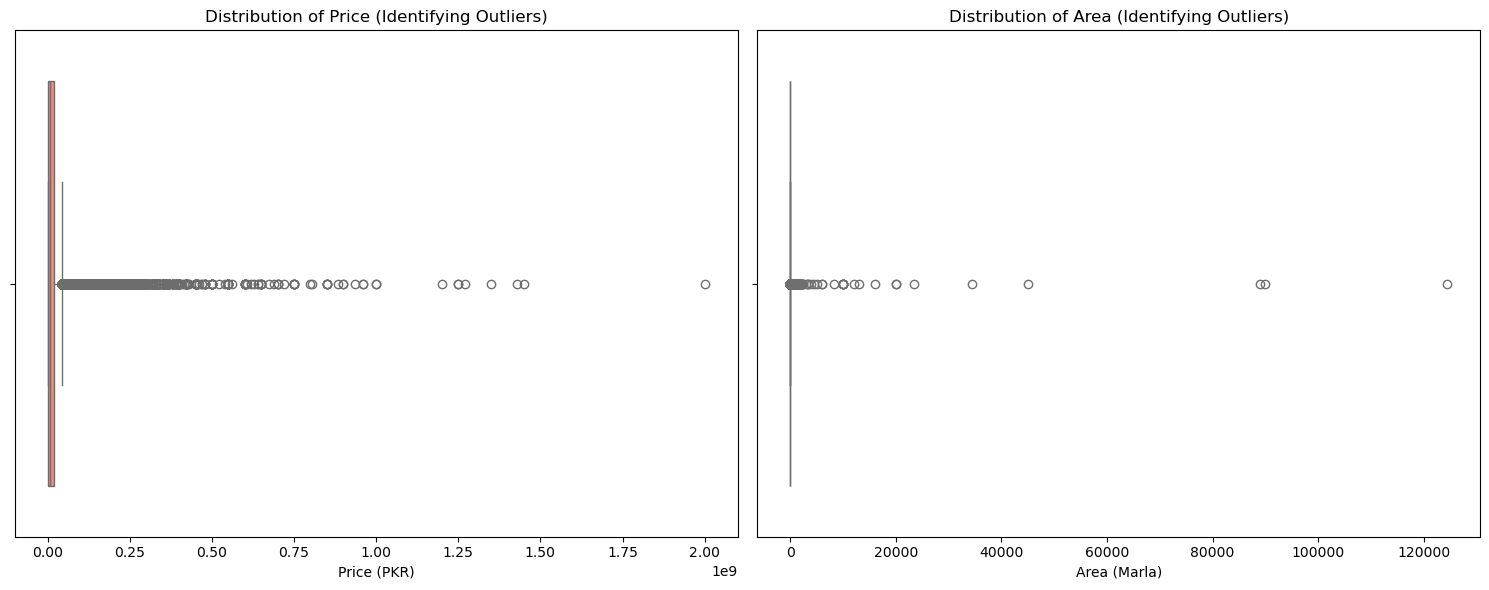

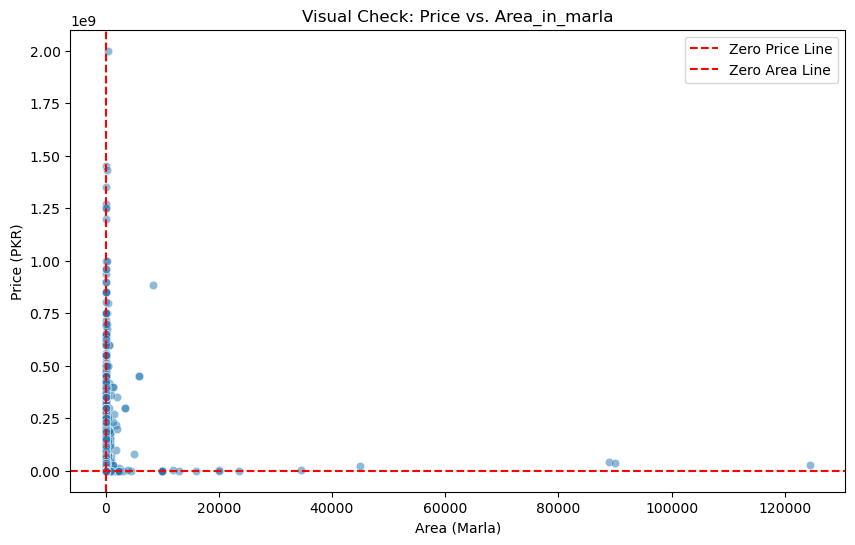

Properties with 0 PKR Price: 3
Properties with 0 Marla Area: 16


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Load the data
file_path = r"C:\Users\muhammad.usman\Downloads\Property Project\Property.csv"
df = pd.read_csv(file_path, sep=';')

# 2. Drop irrelevant columns
cols_to_drop = ['page_url', 'location_id']
df.drop(columns=[c for c in cols_to_drop if c in df.columns], inplace=True)

# 3. Imputation
# Numerical: Fill with mean
num_cols = df.select_dtypes(include=[np.number]).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

# Categorical: Fill with "Unknown"
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].fillna("Unknown")

# 4. Data Transformation: area to area_in_marla
def extract_and_convert_area(area_val):
    try:
        # Convert to string and lowercase
        s = str(area_val).lower().strip()
        
        # Split number from unit (e.g., "5.2 marla" -> ["5.2", "marla"])
        parts = s.split()
        if not parts:
            return 0.0
            
        # Get the numeric part
        num = float(parts[0].replace(',', ''))
        
        # Logic: If Kanal, multiply by 20. Otherwise, assume Marla.
        if 'kanal' in s:
            return num * 20
        else:
            return num
    except:
        return 0.0

# Create the column explicitly
df['area_in_marla'] = df['area'].apply(extract_and_convert_area)

# --- VISUALIZATION: OUTLIERS AND UNREALISTIC VALUES ---

# 5. Boxplots for Price and Area
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['price'], color='salmon')
plt.title('Distribution of Price (Identifying Outliers)')
plt.xlabel('Price (PKR)')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['area_in_marla'], color='skyblue')
plt.title('Distribution of Area (Identifying Outliers)')
plt.xlabel('Area (Marla)')

plt.tight_layout()
plt.show()

# 6. Scatter Plot for Unrealistic Values (Price vs Area)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='area_in_marla', y='price', alpha=0.5)

# Adding lines to highlight 0 values
plt.axhline(0, color='red', linestyle='--', label='Zero Price Line')
plt.axvline(0, color='red', linestyle='--', label='Zero Area Line')

plt.title('Visual Check: Price vs. Area_in_marla')
plt.xlabel('Area (Marla)')
plt.ylabel('Price (PKR)')
plt.legend()
plt.show()

# 7. Print summary of unrealistic values
print(f"Properties with 0 PKR Price: {len(df[df['price'] <= 0])}")
print(f"Properties with 0 Marla Area: {len(df[df['area_in_marla'] <= 0])}") 

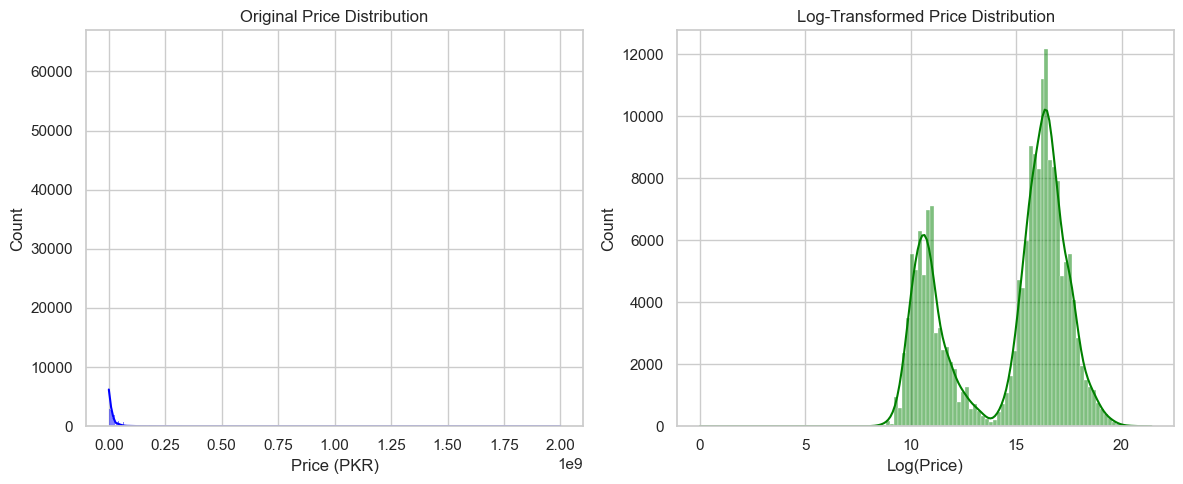

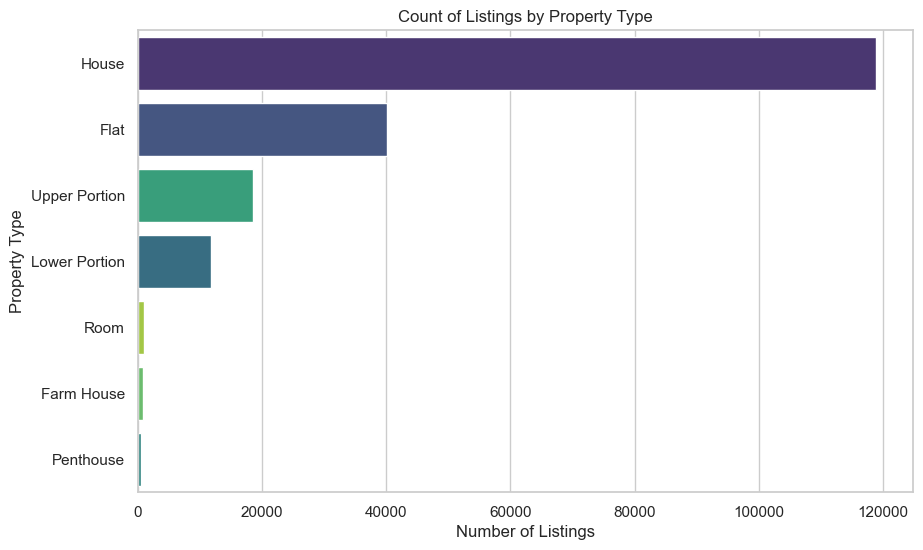

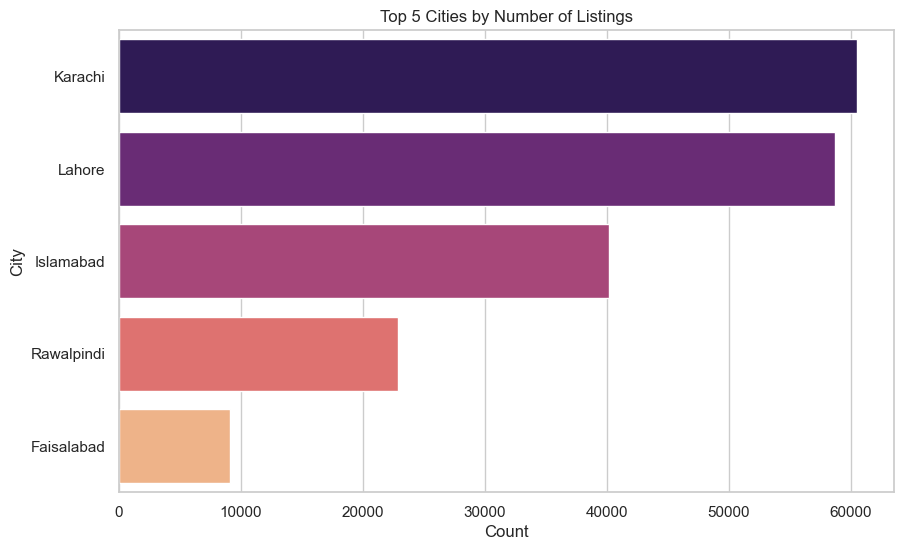

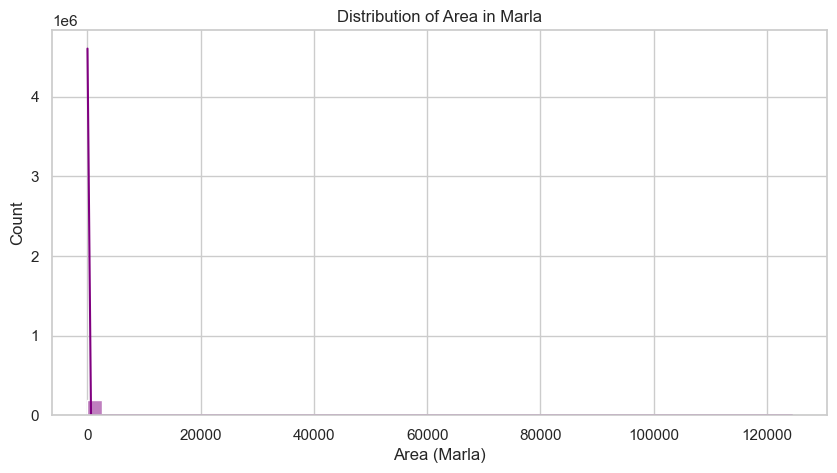

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the visual style
sns.set_theme(style="whitegrid")

# --- 1. Price Distribution ---
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=True, color='blue')
plt.title('Original Price Distribution')
plt.xlabel('Price (PKR)')

plt.subplot(1, 2, 2)
# Using log1p (log(1+x)) to handle any 0 values safely
sns.histplot(np.log1p(df['price']), kde=True, color='green')
plt.title('Log-Transformed Price Distribution')
plt.xlabel('Log(Price)')
plt.tight_layout()
plt.show()

# --- 2. Property Type Counts (Fixed Warning) ---
plt.figure(figsize=(10, 6))
order = df['property_type'].value_counts().index
# Fixed: Added hue='property_type' and legend=False
sns.countplot(data=df, y='property_type', order=order, hue='property_type', palette='viridis', legend=False)
plt.title('Count of Listings by Property Type')
plt.xlabel('Number of Listings')
plt.ylabel('Property Type')
plt.show()

# --- 3. City Representation (Top 5) (Fixed Warning) ---
plt.figure(figsize=(10, 6))
top_5_cities = df['city'].value_counts().head(5)
# Fixed: Added hue=top_5_cities.index and legend=False
sns.barplot(x=top_5_cities.values, y=top_5_cities.index, hue=top_5_cities.index, palette='magma', legend=False)
plt.title('Top 5 Cities by Number of Listings')
plt.xlabel('Count')
plt.ylabel('City')
plt.show()

# --- 4. Area Distribution ---
plt.figure(figsize=(10, 5))
sns.histplot(df['area_in_marla'], kde=True, color='purple', bins=50)
plt.title('Distribution of Area in Marla')
plt.xlabel('Area (Marla)')
plt.show() 

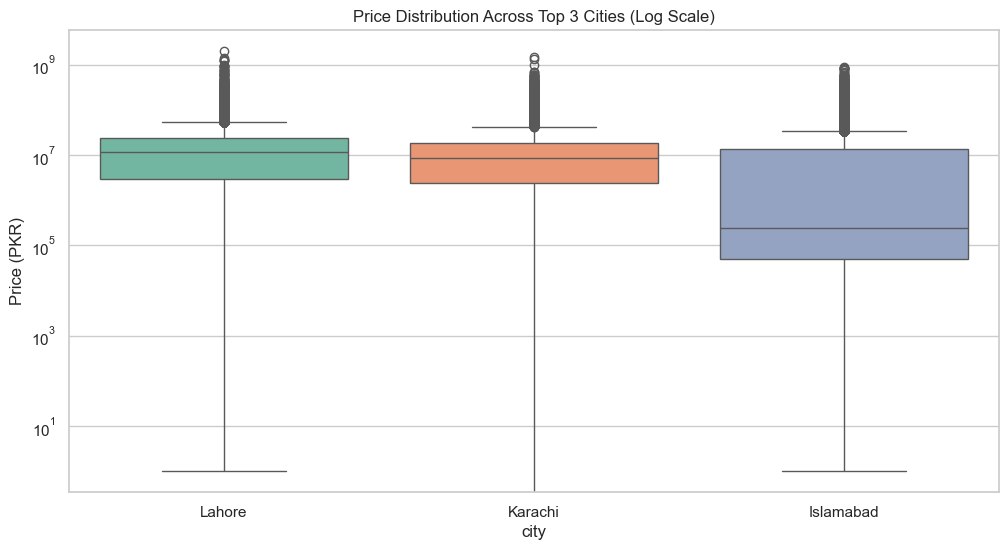

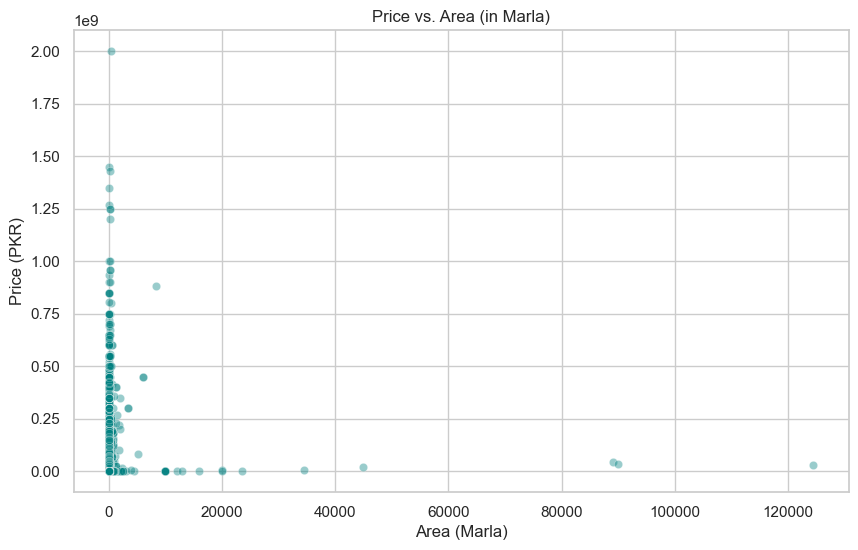

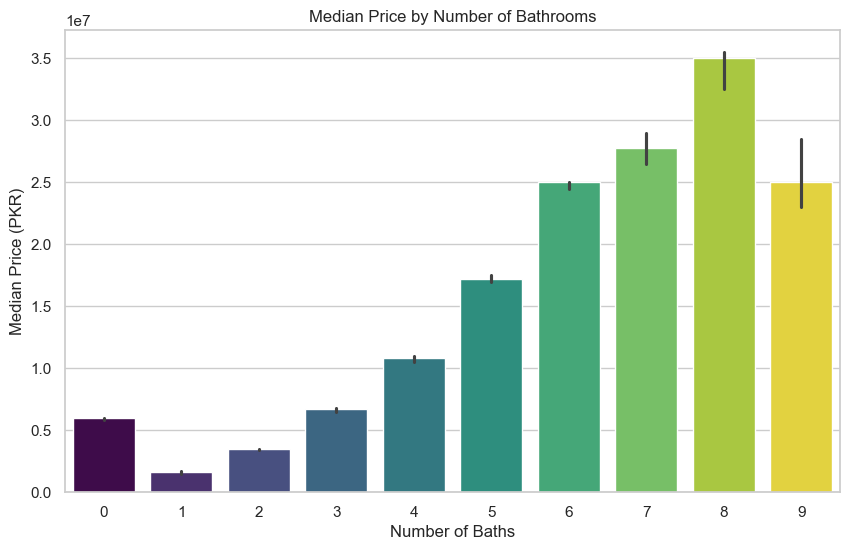

C:\Users\muhammad.usman\AppData\Local\Temp\ipykernel_27512\3248388162.py:42: UserWarning: Parsing dates in %m-%d-%Y format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce', dayfirst=True)


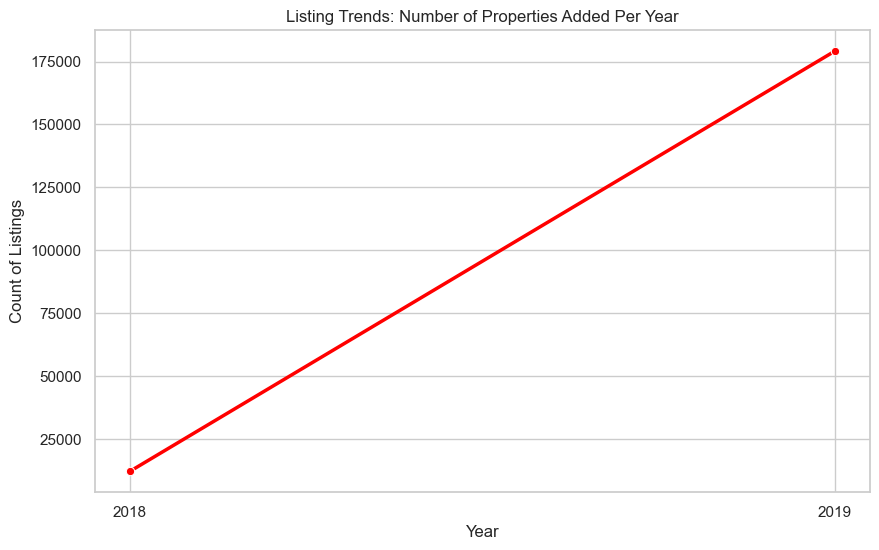

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure visual consistency
sns.set_theme(style="whitegrid")

# --- 5. Price vs. Location (Top 3 Cities) ---
# FIX: Changed .nhead(3) to .head(3)
top_3_cities = df['city'].value_counts().head(3).index
df_top3 = df[df['city'].isin(top_3_cities)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top3, x='city', y='price', hue='city', palette='Set2', legend=False)
plt.title('Price Distribution Across Top 3 Cities (Log Scale)')
plt.ylabel('Price (PKR)')
plt.yscale('log') # Log scale helps handle the massive gap between cheap and luxury prices
plt.show()

# --- 6. Price vs. Area (Scatter Plot) ---
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='area_in_marla', y='price', alpha=0.4, color='teal')
plt.title('Price vs. Area (in Marla)')
plt.xlabel('Area (Marla)')
plt.ylabel('Price (PKR)')
# Note: If the plot looks empty, it's due to extreme outliers. 
# You can uncomment the line below to zoom into typical house sizes:
# plt.xlim(0, 100) 
plt.show()

# --- 7. Bathrooms vs. Price ---
plt.figure(figsize=(10, 6))
# Using median to avoid being skewed by one or two ultra-expensive mansions
sns.barplot(data=df[df['baths'] < 10], x='baths', y='price', estimator='median', palette='viridis', hue='baths', legend=False)
plt.title('Median Price by Number of Bathrooms')
plt.xlabel('Number of Baths')
plt.ylabel('Median Price (PKR)')
plt.show()

# --- 8. Date vs. Count (Trend Analysis) ---
# FIX: Added dayfirst=True or format='mixed' to be safer with date parsing
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce', dayfirst=True)
df['year_added'] = df['date_added'].dt.year

# Filter out rows where date couldn't be parsed (NaN)
df_dates = df.dropna(subset=['year_added'])

plt.figure(figsize=(10, 6))
yearly_counts = df_dates['year_added'].value_counts().sort_index()
sns.lineplot(x=yearly_counts.index.astype(int), y=yearly_counts.values, marker='o', color='red', linewidth=2.5)
plt.title('Listing Trends: Number of Properties Added Per Year')
plt.xlabel('Year')
plt.ylabel('Count of Listings')
plt.xticks(yearly_counts.index.astype(int))
plt.show() 

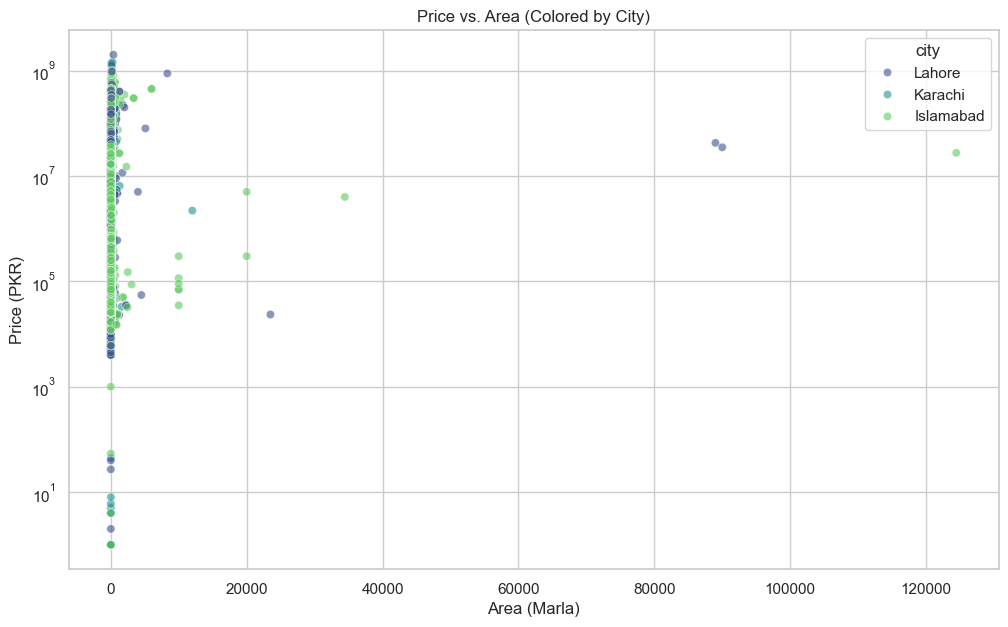

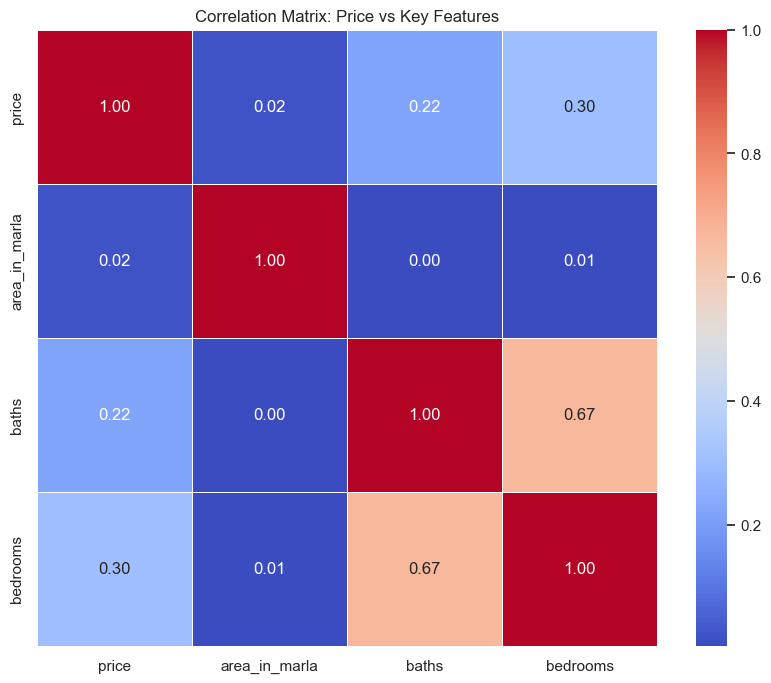

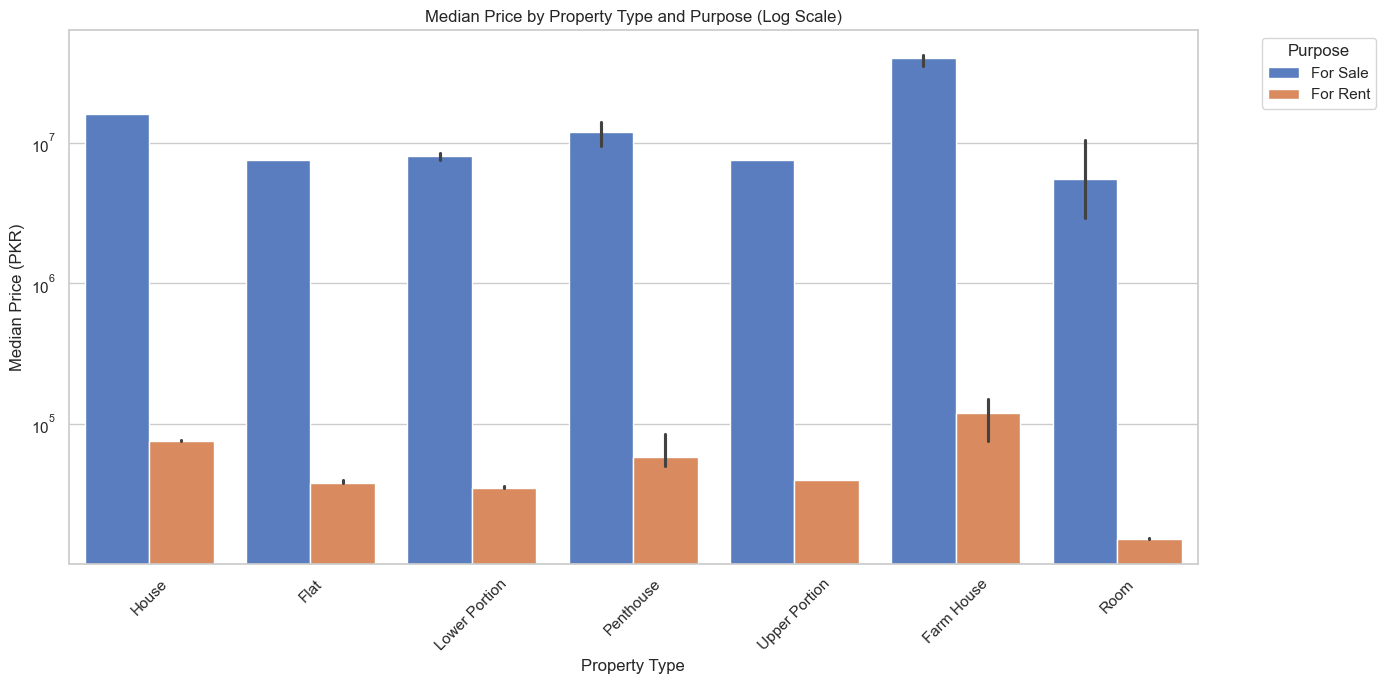

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the visual style
sns.set_theme(style="whitegrid")

# --- 9. Price vs. Area by City (Top 3 Cities) ---
# Ensure top_3_cities and df_top3 are defined
top_3_cities = df['city'].value_counts().head(3).index
df_top3 = df[df['city'].isin(top_3_cities)]

plt.figure(figsize=(12, 7))
sns.scatterplot(data=df_top3, x='area_in_marla', y='price', hue='city', alpha=0.6, palette='viridis')
plt.title('Price vs. Area (Colored by City)')
plt.xlabel('Area (Marla)')
plt.ylabel('Price (PKR)')
plt.yscale('log') 
plt.show()

# --- 10. Correlation Matrix Heatmap (FIXED) ---
plt.figure(figsize=(10, 8))

# 1. Define the columns and calculate the matrix first
corr_cols = ['price', 'area_in_marla', 'baths', 'bedrooms']
correlation_matrix = df[corr_cols].corr()

# 2. Now plot the heatmap using the defined variable 
# If the number is high (e.g., 0.60 to 0.80), then area is your strongest predictor of price. 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix: Price vs Key Features')
plt.show()

# --- 11. Property Type Pricing: Grouped by Purpose ---
plt.figure(figsize=(14, 7))

sns.barplot(
    data=df, 
    x='property_type', 
    y='price', 
    hue='purpose', 
    estimator=np.median, # Median is safer against outliers
    palette='muted'
)

plt.yscale('log') 
plt.title('Median Price by Property Type and Purpose (Log Scale)')
plt.xlabel('Property Type')
plt.ylabel('Median Price (PKR)')
plt.xticks(rotation=45)
plt.legend(title='Purpose', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show() 